# Guess 2/3 of the average

Five people sit down to play a game. They each simultaneously pick a number from 0-20. They then compute the average. The winner is the person whose guess is closest to 2/3 of the average.

The Nash equilibrium is for everyone to guess 0 or 1. However, in practice most people guess a number much higher than that, presumably because they assume that not everyone will play perfectly rationally. This type of game can be used to "unravel" how many levels of cognitive hierarchy people are simulating when playing games.

Nagel, R. (1995). Unraveling in guessing games: An experimental study. The American economic review, 85(5), 1313-1326.

In [1]:
from memo import memo
import jax.numpy as np
import jax
from matplotlib import pyplot as plt

In [2]:
N = np.arange(20 + 1)

In [3]:
@jax.jit
def is_best(n, *p):
    m = np.mean(np.array([n, *p])) * (2/3)
    return np.abs(n - m) <= np.abs(np.array([*p]) - m).min()

@memo(cache=True)
def kbc[n: N](level):
    p0: thinks[
        p1: chooses(n in N, wpp=kbc[n](level - 1) if level > 0 else 1),
        p2: chooses(n in N, wpp=kbc[n](level - 1) if level > 0 else 1),
        p3: chooses(n in N, wpp=kbc[n](level - 1) if level > 0 else 1),
        p4: chooses(n in N, wpp=kbc[n](level - 1) if level > 0 else 1)
    ]
    p0: chooses(n in N, wpp=exp(10 * Pr[is_best(n, p1.n, p2.n, p3.n, p4.n)]))
    return Pr[p0.n == n]

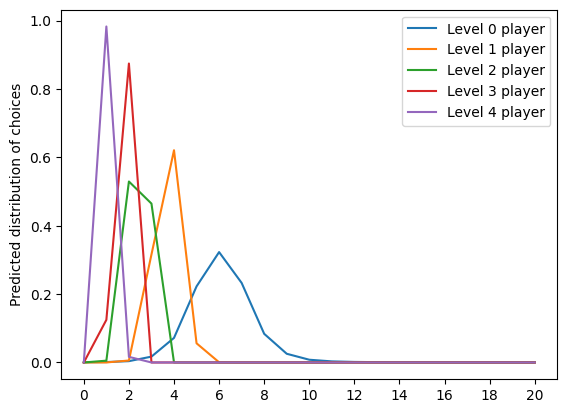

In [4]:
for level in range(5):
    plt.plot(kbc(level), label=f'Level {level} player')
plt.xticks(N[::2])
plt.ylabel('Predicted distribution of choices')
plt.legend()